In [1]:
import pandas as pd

In [194]:
#with open('./database - Copy.json', 'a', encoding='utf-8') as f: #بستن فایل های json ناقص
#    f.write(']')

In [18]:
df = pd.read_json('./database - 1bil.json')

In [7]:
df.shape

(25426, 22)

In [6]:
df['token'].nunique()

25418

In [9]:
sum(df['token'].value_counts() > 1 )

8

In [10]:
df['ناحیه'].nunique()

272

In [11]:
dis = df['ناحیه'].value_counts()
dis

اندیشه        4425
پردیس         3477
پرند          2860
جیحون          984
پاکدشت         854
              ... 
ائمه اطهار       1
قیطریه           1
شهرک دریا        1
گاندی            1
فشم              1
Name: ناحیه, Length: 272, dtype: int64

In [14]:
df.dtypes

ناحیه                  object
نوع ساختمان            object
متن توضیحات            object
token                  object
متراژ                  object
ساخت                   object
اتاق                   object
قیمت کل                object
قیمت هر متر            object
آگهی‌دهنده             object
طبقه                   object
آسانسور               float64
پارکینگ                object
انباری                float64
جزیئات                   bool
آژانس املاک            object
تعداد واحد در طبقه     object
سند                    object
امکانات                object
جهت ساختمان            object
وضعیت واحد             object
تور مجازی ۳۶۰ درجه     object
dtype: object

In [41]:
df.head()

,ناحیه,متن توضیحات,token,متراژ,ساخت,اتاق,قیمت کل,قیمت هر متر,طبقه,آسانسور,پارکینگ,انباری,جزیئات,تعداد واحد در طبقه,سند,امکانات,جهت ساختمان,وضعیت واحد
0,دریاچه شهدای خلیج فارس,17 سال خدمت .قرارداد امضا شده.,QYAlLZs1,۲۰,۱۴۰۰,0,۱۸۰٫۰۰۰٫۰۰۰ تومان,۹٫۰۰۰٫۰۰۰ تومان,۳۰,1.0,True,1.0,False,NaN,NaN,NaN,NaN,NaN
1,چیتگر,۲۵سال \nواریزی ۹۹\nاملاک محترم تماس نگیرد,QYABJPpy,۲۰,۱۴۰۰,0,۱۸۰٫۰۰۰٫۰۰۰ تومان,۹٫۰۰۰٫۰۰۰ تومان,۹,1.0,True,1.0,False,NaN,NaN,NaN,NaN,NaN
2,ورامین,سند تک برگ اعیان، انشعابات همه قابل استفاده. د...,QYA5G7eQ,۵۴,۱۳۹۱,۱,۲۰۰٫۰۰۰٫۰۰۰ تومان,۳٫۷۰۴٫۰۰۰ تومان,۱ از ۳,0.0,False,1.0,True,۲,تک‌برگ,"[آسانسور ندارد, پارکینگ ندارد, انباری, سرویس ب...",NaN,NaN
3,پردیس,یک واحد اپارتمان با پارکینگ و انباری مسقف \nام...,QYAljBlw,۱۰۰,۱۴۰۰,۲,۲۰۰٫۰۰۰٫۰۰۰ تومان,۲٫۰۰۰٫۰۰۰ تومان,۲,1.0,True,1.0,False,NaN,NaN,NaN,NaN,NaN
4,پردیس,بهترین سرمایه گذاری در پردیس \nباکمترین هزینه ...,QYm0jW90,۱۰۰,۱۳۹۹,۲,۲۰۰٫۰۰۰٫۰۰۰ تومان,۲٫۰۰۰٫۰۰۰ تومان,۲,1.0,True,1.0,False,NaN,NaN,NaN,NaN,NaN


In [20]:
df.loc[df['اتاق'] == 'بدون اتاق', 'اتاق'] = '0'

In [22]:
df.drop(['آژانس املاک', 'آگهی‌دهنده', 'نوع ساختمان', 'تور مجازی ۳۶۰ درجه'], axis=1, inplace=True)

In [26]:
df_detail = df[df['جزیئات']==True]
df_detail.reset_index(inplace=True, drop=True)

In [31]:
df_detail.head()

,ناحیه,متن توضیحات,token,متراژ,ساخت,اتاق,قیمت کل,قیمت هر متر,طبقه,آسانسور,پارکینگ,انباری,جزیئات,تعداد واحد در طبقه,سند,امکانات,جهت ساختمان,وضعیت واحد
0,ورامین,سند تک برگ اعیان، انشعابات همه قابل استفاده. د...,QYA5G7eQ,۵۴,۱۳۹۱,۱,۲۰۰٫۰۰۰٫۰۰۰ تومان,۳٫۷۰۴٫۰۰۰ تومان,۱ از ۳,0.0,False,1.0,True,۲,تک‌برگ,"[آسانسور ندارد, پارکینگ ندارد, انباری, سرویس ب...",NaN,NaN
1,قرچک,آپارتمان 52 متری یک خوابه نقاشی شده کف سرامیک ...,QY_M1IEA,۵۲,۱۳۸۴,۱,۲۰۰٫۰۰۰٫۰۰۰ تومان,۳٫۸۴۶٫۰۰۰ تومان,۲ از ۴,0.0,False,1.0,True,۴,تک‌برگ,"[آسانسور ندارد, پارکینگ ندارد, انباری, بالکن, ...",شمالی,بازسازی شده
2,پردیس,یک واحد آپارتمان با پارکینگ انباری مسقف امکانا...,QY_sQfz7,۱۰۰,۱۴۰۰,۲,۲۰۰٫۰۰۰٫۰۰۰ تومان,۲٫۰۰۰٫۰۰۰ تومان,۴ از ۳,1.0,True,1.0,True,۵,سایر,"[آسانسور, پارکینگ, انباری, بالکن, جنس کف سرامی...",جنوبی,NaN
3,پردیس,آپارتمان در شهر جدید پردیس با پارکینگ وانباری ...,QY_gghf-,۱۰۰,۱۳۹۹,۲,۲۰۰٫۰۰۰٫۰۰۰ تومان,۲٫۰۰۰٫۰۰۰ تومان,۵ از ۵,1.0,True,1.0,True,۴,NaN,"[آسانسور, پارکینگ, انباری, بالکن]",NaN,NaN
4,شهر قدس,سوییت ۲۰ متری نوساز\nکل ساختمان نوساز میباشد ...,QYwA4VuE,۲۰,۱۳۹۹,0,۱۹۰٫۰۰۰٫۰۰۰ تومان,۹٫۵۰۰٫۰۰۰ تومان,۶ از ۶,1.0,False,0.0,True,۱,قول‌نامه‌ای,"[آسانسور, پارکینگ ندارد, انباری ندارد, بالکن ن...",غربی,NaN


In [28]:
df_detail.loc[0, 'امکانات']

['آسانسور ندارد',
 'پارکینگ ندارد',
 'انباری',
 'سرویس بهداشتی ایرانی',
 'سرمایش کولر آبی',
 'گرمایش بخاری',
 'تأمین\u200cکننده آب گرم آبگرم\u200cکن']

In [40]:
utility_set = set()
df_detail.agg({'امکانات': lambda x: utility_set.update(x) });
utility_set

{'آسانسور',
 'آسانسور ندارد',
 'انباری',
 'انباری ندارد',
 'بالکن',
 'بالکن ندارد',
 'تأمین\u200cکننده آب گرم آبگرم\u200cکن',
 'تأمین\u200cکننده آب گرم موتورخانه',
 'تأمین\u200cکننده آب گرم پکیج',
 'جنس کف سرامیک',
 'جنس کف سنگ',
 'جنس کف موزائیک',
 'جنس کف موکت',
 'جنس کف پارکت لمینت',
 'جنس کف پارکت چوب',
 'جنس کف کف\u200cپوش PVC',
 'سرمایش اسپلیت',
 'سرمایش داکت اسپلیت',
 'سرمایش فن کوئل',
 'سرمایش کولر آبی',
 'سرمایش کولر گازی',
 'سرویس بهداشتی ایرانی',
 'سرویس بهداشتی ایرانی و فرنگی',
 'سرویس بهداشتی فرنگی',
 'پارکینگ',
 'پارکینگ ندارد',
 'گرمایش از کف',
 'گرمایش اسپلیت',
 'گرمایش بخاری',
 'گرمایش داکت اسپلیت',
 'گرمایش شوفاژ',
 'گرمایش شومینه',
 'گرمایش فن کوئل'}

In [34]:
len(utility_set)

33

In [45]:
utility_true_false = ['بالکن',
                      'ایرانی',
                      'فرنگی',
                     ]

In [46]:
utility_list = ['تأمین\u200cکننده آب گرم',
                'جنس کف',
                'سرمایش',
                'گرمایش'
               ]

In [42]:
def utility_extract(df, utility_list, utility_true_false):
    for i in range (df.shape[0]):
        if df.loc[i, 'جزیئات']:
            for line in df.loc[i, 'امکانات']:
                for obj in utility_list:
                    if obj in line:
                        df.loc[i, obj] = line.replace(obj, '').strip()       
                for obj in utility_true_false:
                    df.loc[i, obj] = False if 'ندارد' in line else True

In [47]:
utility_extract(df_detail, utility_list, utility_true_false)

c:\python\python39\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\python\python39\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [60]:
df_detail.columns

Index(['ناحیه', 'متن توضیحات', 'token', 'متراژ', 'ساخت', 'اتاق', 'قیمت کل',
       'قیمت هر متر', 'طبقه', 'آسانسور', 'پارکینگ', 'انباری', 'جزیئات',
       'تعداد واحد در طبقه', 'سند', 'امکانات', 'جهت ساختمان', 'وضعیت واحد',
       'بالکن', 'ایرانی', 'فرنگی', 'سرمایش', 'گرمایش', 'تأمین‌کننده آب گرم',
       'جنس کف'],
      dtype='object')

In [59]:
df_detail.head(1)

,ناحیه,متن توضیحات,token,متراژ,ساخت,اتاق,قیمت کل,قیمت هر متر,طبقه,آسانسور,...,امکانات,جهت ساختمان,وضعیت واحد,بالکن,ایرانی,فرنگی,سرمایش,گرمایش,تأمین‌کننده آب گرم,جنس کف
0,ورامین,سند تک برگ اعیان، انشعابات همه قابل استفاده. د...,QYA5G7eQ,۵۴,۱۳۹۱,۱,۲۰۰٫۰۰۰٫۰۰۰ تومان,۳٫۷۰۴٫۰۰۰ تومان,۱ از ۳,0.0,...,"[آسانسور ندارد, پارکینگ ندارد, انباری, سرویس ب...",NaN,NaN,True,True,True,کولر آبی,بخاری,آبگرم‌کن,NaN


In [61]:
df_detail.drop(['امکانات', 'جزیئات'], inplace=True, axis=1)

c:\python\python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [62]:
df_detail.columns

Index(['ناحیه', 'متن توضیحات', 'token', 'متراژ', 'ساخت', 'اتاق', 'قیمت کل',
       'قیمت هر متر', 'طبقه', 'آسانسور', 'پارکینگ', 'انباری',
       'تعداد واحد در طبقه', 'سند', 'جهت ساختمان', 'وضعیت واحد', 'بالکن',
       'ایرانی', 'فرنگی', 'سرمایش', 'گرمایش', 'تأمین‌کننده آب گرم', 'جنس کف'],
      dtype='object')

In [172]:
df_detail.dtypes

ناحیه                  category
متن توضیحات              object
token                    object
متراژ                     int32
ساخت                      int64
اتاق                      int32
قیمت کل                   int64
قیمت هر متر               int64
طبقه                     object
آسانسور                    bool
پارکینگ                    bool
انباری                     bool
تعداد واحد در طبقه     category
سند                    category
جهت ساختمان            category
وضعیت واحد             category
بالکن                      bool
ایرانی                     bool
فرنگی                      bool
سرمایش                 category
گرمایش                 category
تأمین‌کننده آب گرم    category
جنس کف                 category
طبقه واحد                 int64
کل طبقات                  int64
dtype: object

In [109]:
be_category=['سند',
             'وضعیت واحد',
             'جهت ساختمان',
             'ناحیه',
             'تعداد واحد در طبقه',
             'گرمایش',
             'سرمایش',
             'جنس کف',
             'تأمین‌کننده آب گرم',
            ]

In [114]:
for col in be_category:
    if df_detail[col].dtype == 'O':
        df_detail[col] = df_detail[col].astype('category')

C:\Users\AMIREL~1\AppData\Local\Temp/ipykernel_1424/2214753820.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_detail[col] = df_detail[col].astype('category')


In [117]:
df_detail['اتاق'] = df_detail['اتاق'].astype('int')

C:\Users\AMIREL~1\AppData\Local\Temp/ipykernel_1424/191283039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_detail['اتاق'] = df_detail['اتاق'].astype('int')


In [119]:
df_detail['متراژ'] = df_detail['متراژ'].astype('int')

C:\Users\AMIREL~1\AppData\Local\Temp/ipykernel_1424/3362237149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_detail['متراژ'] = df_detail['متراژ'].astype('int')


In [66]:
df_detail['ناحیه'] = df_detail['ناحیه'].astype('category')

C:\Users\AMIREL~1\AppData\Local\Temp/ipykernel_1424/3303459406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_detail['ناحیه'] = df_detail['ناحیه'].astype('category')


In [72]:
df_detail['ناحیه'].cat.codes.max()

244

In [75]:
True_false_columns = ['بالکن',
                      'ایرانی',
                      'فرنگی',
                      'آسانسور',
                      'پارکینگ',
                      'انباری',
                     ]

In [76]:
for obj in True_false_columns:
    df_detail[obj] = df_detail[obj].astype('bool')

C:\Users\AMIREL~1\AppData\Local\Temp/ipykernel_1424/4061765738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_detail[obj] = df_detail[obj].astype('bool')


In [96]:
for col in ['قیمت کل', 'قیمت هر متر']:
    df_detail[col] =  df_detail[col].str.replace('٫', '').str.replace('تومان', '').dropna().astype('int64')

C:\Users\AMIREL~1\AppData\Local\Temp/ipykernel_1424/3176075015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_detail[col] =  df_detail[col].str.replace('٫', '').str.replace('تومان', '').dropna().astype('int64')


In [184]:
df

,ناحیه,متن توضیحات,token,متراژ,ساخت,اتاق,قیمت کل,قیمت هر متر,طبقه,آسانسور,پارکینگ,انباری,جزیئات,تعداد واحد در طبقه,سند,امکانات,جهت ساختمان,وضعیت واحد
0,دریاچه شهدای خلیج فارس,17 سال خدمت .قرارداد امضا شده.,QYAlLZs1,۲۰,۱۴۰۰,0,180000000.0,9000000.0,۳۰,1.0,True,1.0,False,NaN,NaN,NaN,NaN,NaN
1,چیتگر,۲۵سال \nواریزی ۹۹\nاملاک محترم تماس نگیرد,QYABJPpy,۲۰,۱۴۰۰,0,180000000.0,9000000.0,۹,1.0,True,1.0,False,NaN,NaN,NaN,NaN,NaN
2,ورامین,سند تک برگ اعیان، انشعابات همه قابل استفاده. د...,QYA5G7eQ,۵۴,۱۳۹۱,۱,200000000.0,3704000.0,۱ از ۳,0.0,False,1.0,True,۲,تک‌برگ,"[آسانسور ندارد, پارکینگ ندارد, انباری, سرویس ب...",NaN,NaN
3,پردیس,یک واحد اپارتمان با پارکینگ و انباری مسقف \nام...,QYAljBlw,۱۰۰,۱۴۰۰,۲,200000000.0,2000000.0,۲,1.0,True,1.0,False,NaN,NaN,NaN,NaN,NaN
4,پردیس,بهترین سرمایه گذاری در پردیس \nباکمترین هزینه ...,QYm0jW90,۱۰۰,۱۳۹۹,۲,200000000.0,2000000.0,۲,1.0,True,1.0,False,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25421,رودهن,75 متری فول، بر سجادیان\nفول امکانات کابینت ام...,QYogYjYJ,۷۵,۱۳۹۳,۲,975000000.0,13000000.0,۱,1.0,True,1.0,False,NaN,NaN,NaN,NaN,NaN
25422,شبیری,اپارتمان شیک و مجلل و زیر قیمت \n\n۴۵ متر دو خ...,QYvAYMCR,۴۵,۱۳۹۱,۲,980000000.0,21778000.0,۴ از ۵,1.0,True,1.0,True,۴,تک‌برگ,"[آسانسور, پارکینگ, انباری, بالکن, جنس کف سرامی...",NaN,NaN
25423,سلسبیل,۴۱متر تک خواب\n\nاسانسور \n\nگذر ۱۰ متر\n\...,QYxICWOu,۴۱,۱۳۹۵,۱,920000000.0,22439000.0,۱,1.0,False,0.0,False,NaN,NaN,NaN,NaN,NaN
25424,شهر قدس,با سلام \nواحد ۹۰ متری فول امکانات ،:\nپارکینگ...,QYHQNmZp,۹۰,۱۳۹۸,۲,945000000.0,10500000.0,۱ از ۵,1.0,True,1.0,True,۲,NaN,"[آسانسور, پارکینگ, انباری, بالکن, جنس کف سرامی...",NaN,NaN


In [183]:
for col in ['قیمت کل', 'قیمت هر متر']:
    df[col] =  df[col].str.replace('٫', '').str.replace('تومان', '').dropna().astype('int64')

AttributeError: Can only use .str accessor with string values!

In [78]:
def year2num(txt:str):
    if txt.isnumeric():
        return int(txt)
    else:
        return 1370

In [100]:
df_detail['ساخت'] = df_detail.agg({'ساخت':year2num})

C:\Users\AMIREL~1\AppData\Local\Temp/ipykernel_1424/2090302794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_detail['ساخت'] = df_detail.agg({'ساخت':year2num})


In [151]:
df_detail['طبقه واحد'].unique()

array(['۱', '۲', '۴', '۵', '۶', '۳', 'همکف', 'زیرهمکف', '۲۰', '۷', '۱۲',
       '۱۵', '۹', '۱۰', '+۳۰', '۱۱', '۱۳', '۱۴', '۸', '۳۰', '۲۹', '۳۰+',
       '۲۴', '۲۵', '۱۹', '۱۶'], dtype=object)

In [158]:
def choose_floor(txt):
    split = txt.split(' از ')[0]
    if split.isnumeric():
        split = int(split)
    else:
        split = {'زیرهمکف':-1,
                 'همکف':0,
                 '+۳۰':31,
                 '۳۰+':31}[split]
    return split    

In [159]:
df_detail['طبقه واحد'] = df_detail['طبقه'].apply(lambda x: choose_floor(x))

C:\Users\AMIREL~1\AppData\Local\Temp/ipykernel_1424/2776735265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_detail['طبقه واحد'] = df_detail['طبقه'].apply(lambda x: choose_floor(x))


In [161]:
df_detail['کل طبقات'] = df_detail['طبقه'].apply(lambda x: int(x.split(' از ')[1]) if len(x.split(' از '))==2 else 0)

C:\Users\AMIREL~1\AppData\Local\Temp/ipykernel_1424/2387068707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_detail['کل طبقات'] = df_detail['طبقه'].apply(lambda x: int(x.split(' از ')[1]) if len(x.split(' از '))==2 else 0)


In [203]:
df.shape

(62623, 22)

In [204]:
df['سند'].value_counts()

تک‌برگ         24909
منگوله‌دار      1119
سایر            1024
قول‌نامه‌ای      361
Name: سند, dtype: int64

In [206]:
df['قیمت کل']

0        ۱٫۱۰۰٫۰۰۰٫۰۰۰ تومان
1        ۱٫۱۰۰٫۰۰۰٫۰۰۰ تومان
2        ۱٫۱۰۰٫۰۰۰٫۰۰۰ تومان
3        ۱٫۰۵۰٫۰۰۰٫۰۰۰ تومان
4        ۱٫۱۰۰٫۰۰۰٫۰۰۰ تومان
                ...         
62618    ۴٫۶۸۰٫۰۰۰٫۰۰۰ تومان
62619    ۴٫۷۰۰٫۰۰۰٫۰۰۰ تومان
62620    ۴٫۷۰۰٫۰۰۰٫۰۰۰ تومان
62621    ۴٫۷۰۰٫۰۰۰٫۰۰۰ تومان
62622    ۴٫۶۵۰٫۰۰۰٫۰۰۰ تومان
Name: قیمت کل, Length: 62623, dtype: object

In [87]:
df['قیمت کل'].str.replace('٫', '').str.replace('تومان', '').dropna().astype('int64')

0        180000000
1        180000000
2        200000000
3        200000000
4        200000000
           ...    
25421    975000000
25422    980000000
25423    920000000
25424    945000000
25425    990000000
Name: قیمت کل, Length: 25425, dtype: int64

In [170]:
df_detail.drop_duplicates(subset='token', inplace=True)

c:\python\python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [178]:
df_detail.dropna(inplace=True)

c:\python\python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [179]:
MAT_X = df_detail.drop(['طبقه', 'token', 'متن توضیحات','قیمت کل', 'قیمت هر متر'], axis=1)

In [180]:
VEC_Y = df_detail['قیمت کل']

In [181]:
VEC_Y2 = df_detail['قیمت هر متر']

<AxesSubplot:ylabel='Frequency'>

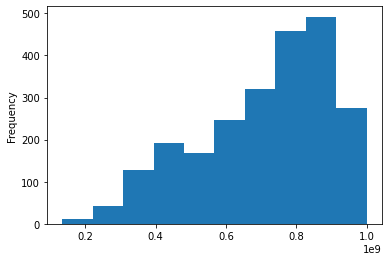

In [182]:
VEC_Y.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

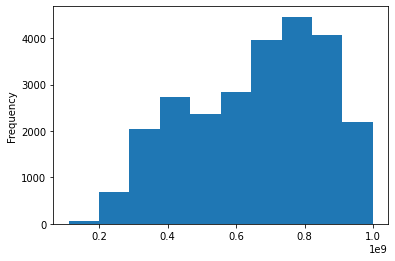

In [185]:
df['قیمت کل'].plot(kind='hist')

In [201]:
MAT_X.to_pickle('mat_x.pkl')

In [204]:
VEC_Y.to_pickle('vec_y.pkl')

In [205]:
VEC_Y2.to_pickle('vec_y2.pkl')

In [202]:
test = pd.read_pickle('mat_x.pkl')

In [203]:
test.dtypes

ناحیه                  category
متراژ                     int32
ساخت                      int64
اتاق                      int32
آسانسور                    bool
پارکینگ                    bool
انباری                     bool
تعداد واحد در طبقه     category
سند                    category
جهت ساختمان            category
وضعیت واحد             category
بالکن                      bool
ایرانی                     bool
فرنگی                      bool
سرمایش                 category
گرمایش                 category
تأمین‌کننده آب گرم    category
جنس کف                 category
طبقه واحد                 int64
کل طبقات                  int64
dtype: object

In [188]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           2334 non-null   int64 
 1   ناحیه                2334 non-null   object
 2   متراژ                2334 non-null   int64 
 3   ساخت                 2334 non-null   int64 
 4   اتاق                 2334 non-null   int64 
 5   آسانسور              2334 non-null   bool  
 6   پارکینگ              2334 non-null   bool  
 7   انباری               2334 non-null   bool  
 8   تعداد واحد در طبقه   2334 non-null   object
 9   سند                  2334 non-null   object
 10  جهت ساختمان          2334 non-null   object
 11  وضعیت واحد           2334 non-null   object
 12  بالکن                2334 non-null   bool  
 13  ایرانی               2334 non-null   bool  
 14  فرنگی                2334 non-null   bool  
 15  سرمایش               2334 non-null   object
 16  گرمایش